### Importing necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#suppress warnings
import warnings
warnings.filterwarnings("ignore")

### Reading and understanding data:

In [2]:
df = pd.read_csv("Leads.csv")

In [3]:
# Checking shape of data.
df.shape

(9240, 37)

In [4]:
# To view all the columns in dataset.
pd.set_option("display.max_columns",60)

# Checking first five rows.
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Checking info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Checking any missing values.
100*(df.isnull().mean()).sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [7]:
# Checking if any duplicates present.
df.duplicated().sum()

0

### Data cleaning:

##### Dropping redundant columns:

In [8]:
# "Prospect ID" and "Lead Number" contain unique id numbers, hence can be dropped from dataset.
# Last Activity and Last Notable Activity: are highly correlated, hence dropping one of them.

df = df.drop(["Prospect ID","Lead Number","Last Activity"],axis=1)

##### Handling categorical variables having "select" level:

In [9]:
df = df.replace("Select", np.nan)

##### Missing value treatment:

In [10]:
# Dropping cloumns having missing value percentage greater than 40.
# Total visits,Page Views Per Visit, Last Activity has less than 2% percent missing values. Dropping rows for them
for col in df.columns:
    if 100*(df.isnull().mean())[col]>40:
        df = df.drop(col,axis=1)

df.dropna(subset=["TotalVisits","Page Views Per Visit","Lead Source"],inplace=True)

In [11]:
# Checking shape again after dropping columns.
df.shape

(9074, 27)

In [12]:
100*df.isnull().mean().sort_values(ascending=False)

City                                             39.398281
Tags                                             36.665197
Specialization                                   36.169275
What matters most to you in choosing a course    29.777386
What is your current occupation                  29.567996
Country                                          25.303064
Lead Origin                                       0.000000
Newspaper                                         0.000000
A free copy of Mastering The Interview            0.000000
I agree to pay the amount through cheque          0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Magazine                                          0.000000
X Education Forums                                0.0000

### Univariate analysis:

#### Categorical Features:

In [13]:
# Calculating value counts for categorical features

for col in df.select_dtypes(include="object").columns:
    print("\033[1m"+col+":"+"\033[0m")
    print((df[col].value_counts(normalize=True,dropna=False))*100)
    print()

Lead Origin:
Landing Page Submission    53.835133
API                        39.431342
Lead Add Form               6.402909
Lead Import                 0.330615
Name: Lead Origin, dtype: float64

Lead Source:
Google               31.606789
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
google                0.055102
Click2call            0.044082
Press_Release         0.022041
Social Media          0.022041
Live Chat             0.022041
youtubechannel        0.011020
NC_EDM                0.011020
Pay per Click Ads     0.011020
welearnblog_Home      0.011020
testone               0.011020
blog                  0.011020
WeLearn               0.011020
Name: Lead Source, dtype: float64

Do Not Email:
No     92.109323
Yes     7.890677
Name: Do Not Email, dtype: float64

Do Not Call:
No     9

Some of the variables have more than 95% imbalance, dropping those columns.

In [14]:
drop_list = []
for col in df.columns:
    if df[col].dtypes == "object":
        val_cnt = (df[col].value_counts(normalize=True,dropna=False))*100
        for i in val_cnt.index:
            if val_cnt[i] >= 95.00:
                drop_list.append(col)
print(drop_list)

# Dropping the columns
df = df.drop(drop_list,axis = 1)

['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [15]:
df.select_dtypes(include="object").columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Some of the variables have many categories but weightage of these categories are very less, hence combining them together in suitable categories.

In [16]:
# Lead Source:

# There are two categories for Google and google combining into one Google. 
# There are separate categories for social media and Facebook. 
# There are separate categories for welearn_blog, blog and welearn. 
# But all these categories are less in percentage hence grouping them.

df["Lead Source"] = df["Lead Source"].apply(lambda x: "Google" if x == "google" else x)
df["Lead Source"] = df["Lead Source"].apply(lambda x: "Other sources" if df["Lead Source"].value_counts(normalize=True,dropna=False)[x]< 0.1 else x)

In [17]:
# Country:

# Country column has 75% of values of India and 25% nan and remaining are of other countries. Hence dropping country column.
df.drop("Country",inplace=True,axis=1)

In [18]:
# Specialization:

# Specialization has 36 % of missing values, these values can be replaced by "Not specified".
# As specialization has many management categories, we can combine them into one category called management.

df["Specialization"] = df["Specialization"].replace(np.nan,"Not specified")
mngmt_list = [x for x in df["Specialization"].unique() if "Management" in x]
df["Specialization"] = df["Specialization"].replace(mngmt_list,"Management")

In [19]:
# "What is your current occupation".

# Replacing missing values with mode.

df["What is your current occupation"] = df["What is your current occupation"].replace(np.nan,"Unemployed")

In [20]:
# "What matters most to you in choosing a course":

# After replacing missing value with mode the data imbalance would be 99%, hence dropping.

df.drop("What matters most to you in choosing a course",inplace=True,axis=1)

In [21]:
# Tags:

# Tags have 36% missing values, which may be replaced by "Not tagged".
# There are lots categories having very less percentage hence grouping them together in "Other tags"

df["Tags"] = df["Tags"].replace(np.nan,"Not tagged")
df["Tags"] = df["Tags"].apply(lambda x: "Other tags" if df["Tags"].value_counts(normalize=True,dropna=False)[x]< 0.02 else x)

In [22]:
# City:

# City have 39% of missing values replacing nan with Mumbai.

df["City"] = df["City"].replace(np.nan,"Mumbai")

In [23]:
# Last Notable Activity:

# Combining categories together which have less than 5 percentage.
df["Last Notable Activity"] = df["Last Notable Activity"].apply(lambda x: "Other activity" if df["Last Notable Activity"].value_counts(normalize=True,dropna=False)[x]< 0.05 else x)

In [24]:
# Checking shape
df.shape

(9074, 13)

In [25]:
# Initialy number of rows were 9240 after data cleaning process it is 9074.
# Number of columns reduced to 10 from 37.

print("Percentge of data remained after data cleaning is: ")
print(round((9074*100/9240),2))

Percentge of data remained after data cleaning is: 
98.2


##### Plots:

Lead Origin:


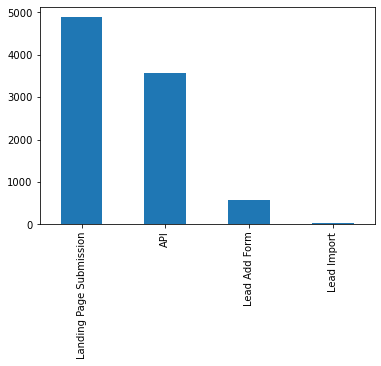

Lead Source:


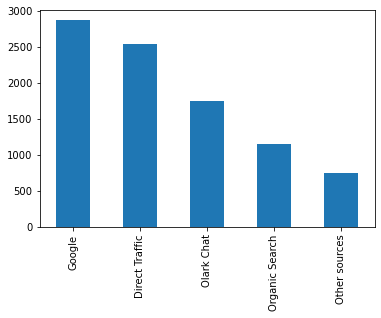

Do Not Email:


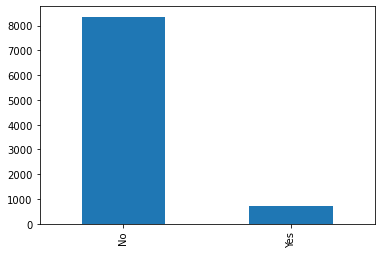

Specialization:


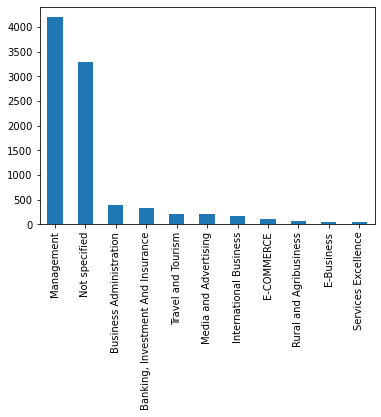

What is your current occupation:


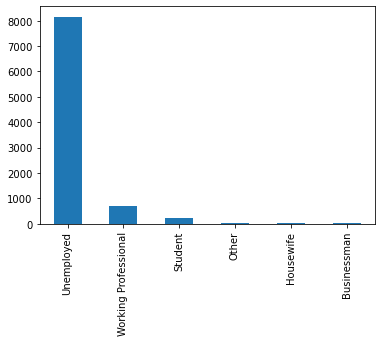

Tags:


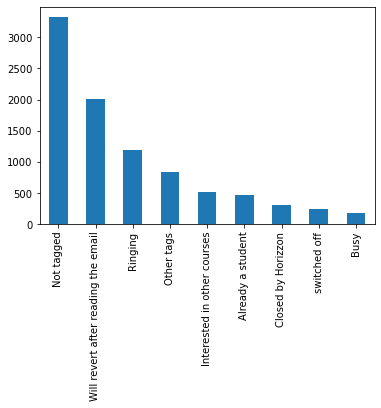

City:


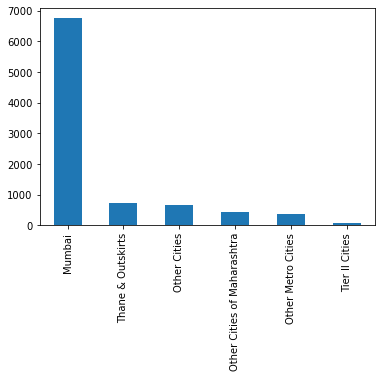

A free copy of Mastering The Interview:


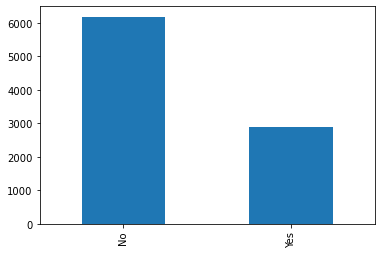

Last Notable Activity:


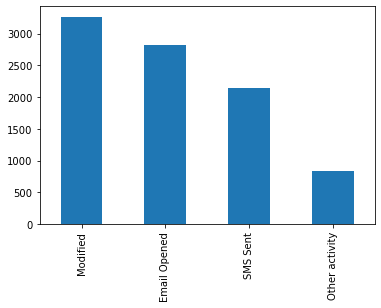

In [26]:
# Plotting count plot.

for col in df.select_dtypes(include="object").columns:
    print("\033[1m"+col+":"+"\033[0m")
    df[col].value_counts().plot.bar()
    plt.show()

#### Target:

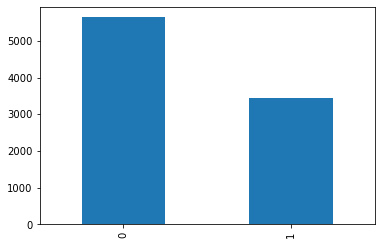

In [27]:
df["Converted"].value_counts().plot.bar()
plt.show()

In [28]:
# Conversion rate:

conversion_rate = (sum(df['Converted'])/len(df['Converted']))*100
round(conversion_rate,3)

37.855

##### Observations:

1. Lead identified by landing page submission is highest followed by API.
2. Google has sourced highest number of leads.
3. Management related specialization are more in mumbers.
4. Leads have come to know about X-education mostly through online search.
5. Most leads have not tagged but "will revert after reading the email" is the most common tag.
6. Most of the leads do not want A free copy of Mastering The Interview.
7. Last Notable Activity for most of leads is modified.

#### Numerical Features:

In [29]:
# Checking numerical summary
df[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


TotalVisits:


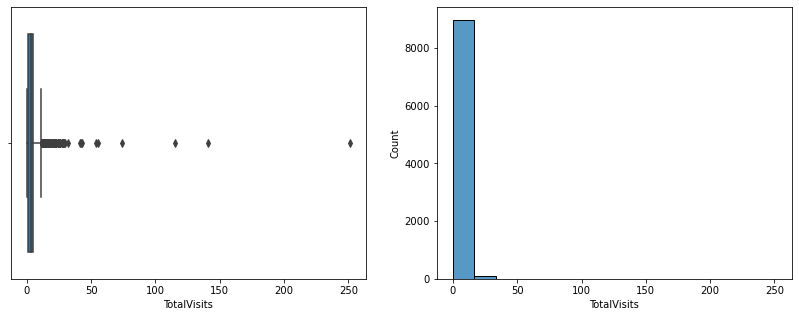

Total Time Spent on Website:


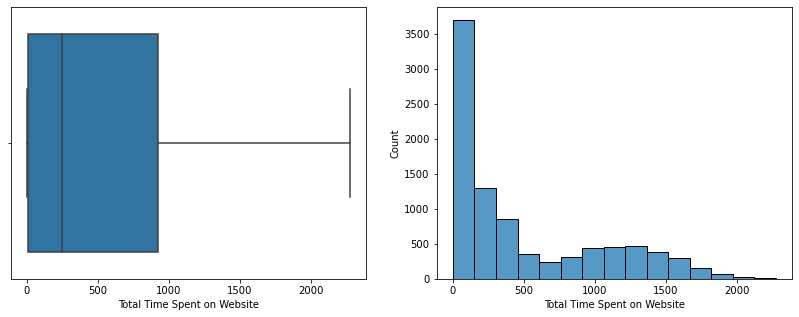

Page Views Per Visit:


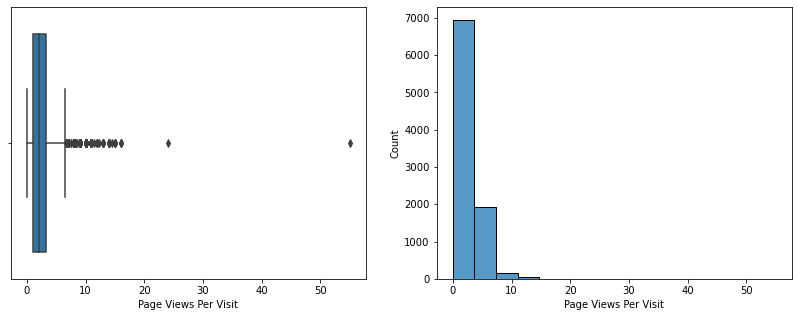

In [30]:
# Plotting box plot for numerical variables.
for col in ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]:
    fig,axs=plt.subplots(1,2)
    fig.set_figheight(5)
    fig.set_figwidth(14)
    print(col+":")
    sns.boxplot(data = df, x=col, ax=axs[0])
    sns.histplot(data=df, x=col,ax=axs[1],bins=15)
    plt.show()

##### Observations:
There are outliers present in "TotalVisits" and "Page Views Per Visit" data. For business point of view high number of "TotalVisits" and "Page Views Per Visit" can have impact on conversion.

### Bivariate Analysis:

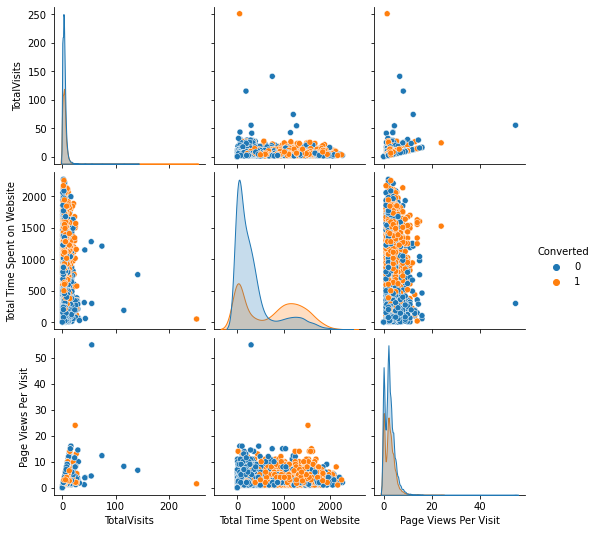

In [31]:
# Visualising numerical data using seaborn pair plot.
sns.pairplot(data=df, vars=["TotalVisits","Total Time Spent on Website","Page Views Per Visit"],hue="Converted")
plt.show()

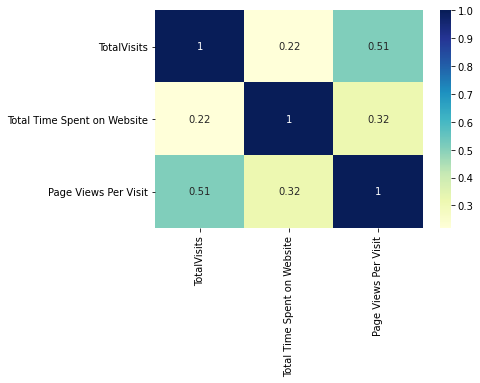

In [32]:
# Plotting correlation matrix between numerical variables
sns.heatmap(df[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]].corr(), annot=True, cmap ="YlGnBu")
plt.show()

TotalVisits:


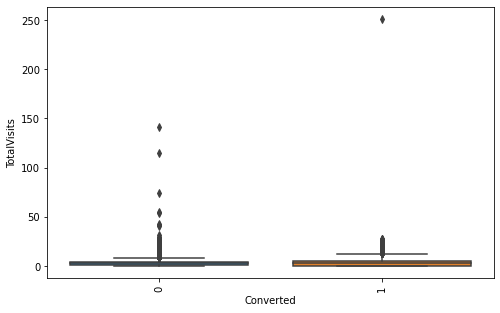

Total Time Spent on Website:


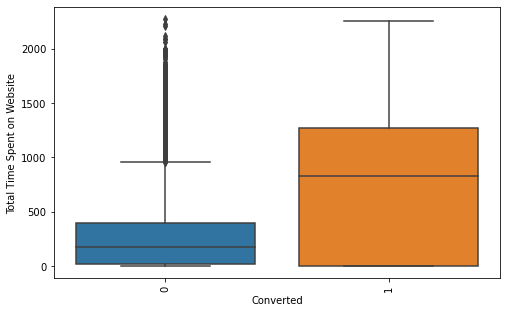

Page Views Per Visit:


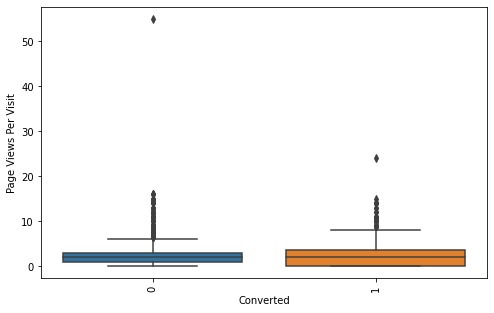

In [33]:
# Plotting box plots with respect to target variable converted.
for var in ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]:
        plt.figure(figsize=(8,5))
        print(var+":")
        sns.boxplot(x="Converted", y=var, data=df)
        plt.xticks(rotation = 90)
        plt.show()

Lead Origin:


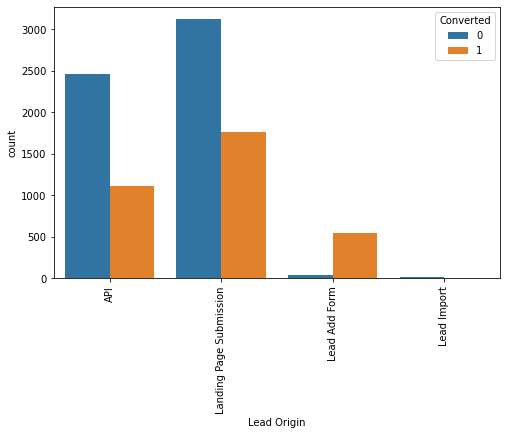


Lead Source:


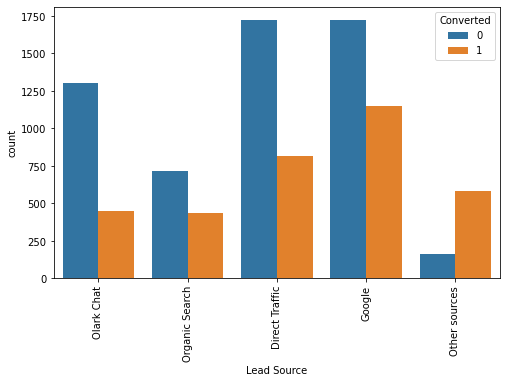


Do Not Email:


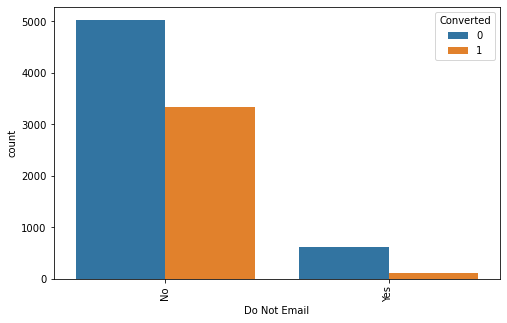


Specialization:


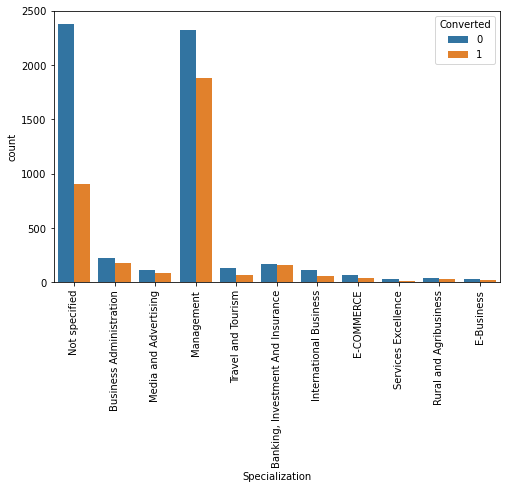


What is your current occupation:


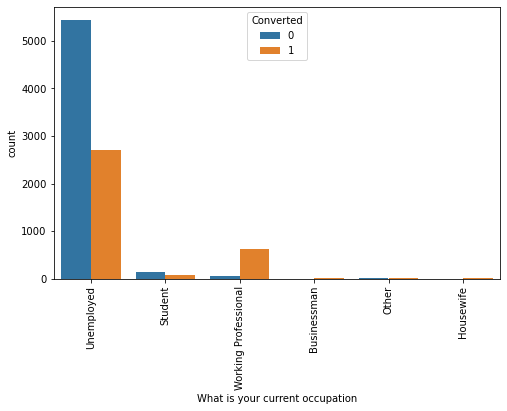


Tags:


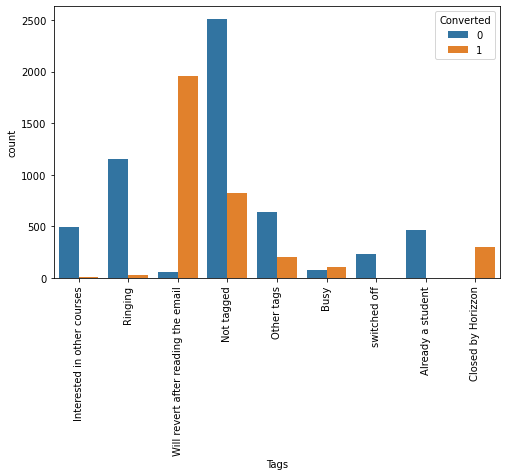


City:


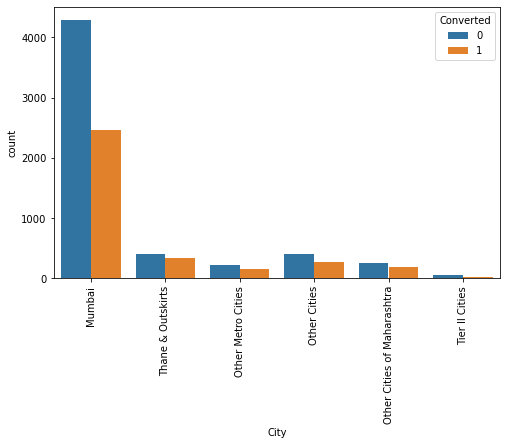


A free copy of Mastering The Interview:


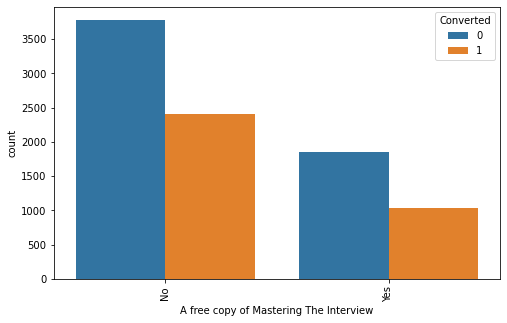


Last Notable Activity:


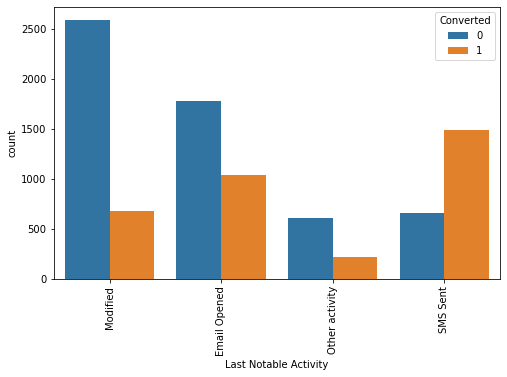

In [34]:
# Plotting box plots with respect to target variable converted.
for var in df.select_dtypes(include="object").columns:
    plt.figure(figsize=(8,5))
    print(var+":")
    sns.countplot(df[var],hue=df["Converted"])
    plt.xticks(rotation = 90)
    plt.show()
    print()

Outlier treatment:

In [35]:
# Capping the outliers at 99 percentile

df["TotalVisits"] = df["TotalVisits"].apply(lambda x: df["TotalVisits"].quantile(.99) if x>df["TotalVisits"].quantile(.99) else x)
df["Total Time Spent on Website"] = df["Total Time Spent on Website"].apply(lambda x: df["Total Time Spent on Website"].quantile(.99) if x>df["Total Time Spent on Website"].quantile(.99) else x)
df["Page Views Per Visit"] = df["Page Views Per Visit"].apply(lambda x: df["Page Views Per Visit"].quantile(.99) if x>df["Page Views Per Visit"].quantile(.99) else x)

##### Observations:

1. Lead add from has highest conversion rate in lead origin category

2. Reference lead source has high conversion rate.

3. Last activity as Sms sent has highest conversion rate.

4. Working professionals have high conversion rate.

5. Lead who tagged as will revert after reading the email, have high conversion rate.

### Data preparation:

##### Converting binary categorical variable (Yes/No) to 0/1:

In [36]:
df[["Do Not Email","A free copy of Mastering The Interview"]] = df[["Do Not Email","A free copy of Mastering The Interview"]].apply(lambda x: x.map({'Yes': 1, "No": 0}))

##### Creating dummy features for categorical variables having multiple levels:

In [37]:
# Creating dummies
lead_origin = pd.get_dummies(df["Lead Origin"], prefix="lead_origin")
lead_origin = lead_origin.drop("lead_origin_Lead Import", axis =1)

lead_source = pd.get_dummies(df["Lead Source"], prefix="lead_source")
lead_source = lead_source.drop("lead_source_Other sources", axis =1)

last_notable_activity = pd.get_dummies(df["Last Notable Activity"], prefix="last_notable_activity")
last_notable_activity = last_notable_activity.drop("last_notable_activity_Other activity", axis =1)

specialization = pd.get_dummies(df["Specialization"], prefix="specialization")
specialization = specialization.drop("specialization_Not specified", axis =1)

tags = pd.get_dummies(df["Tags"], prefix="tags")
tags = tags.drop("tags_Other tags", axis =1)

occupation = pd.get_dummies(df["What is your current occupation"], prefix="occupation")
occupation = occupation.drop("occupation_Other", axis =1)

city = pd.get_dummies(df["City"],prefix="city")
city = city.drop("city_Other Cities", axis =1)

In [38]:
# Concatenating above created dfs in main df.
df = pd.concat([df, lead_origin, lead_source, last_notable_activity, specialization, tags, occupation, city], axis=1)

In [39]:
# Dropping columns for which we have created dummies.
df.drop(["Lead Origin", "Lead Source", "Last Notable Activity", "Specialization", "Tags", "What is your current occupation", "City"], axis=1, inplace=True) 

In [40]:
# Checking shape and head of the datset
print(df.shape)
df.head()

(9074, 44)


,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_source_Direct Traffic,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,last_notable_activity_Email Opened,last_notable_activity_Modified,last_notable_activity_SMS Sent,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_International Business,specialization_Management,specialization_Media and Advertising,specialization_Rural and Agribusiness,specialization_Services Excellence,specialization_Travel and Tourism,tags_Already a student,tags_Busy,tags_Closed by Horizzon,tags_Interested in other courses,tags_Not tagged,tags_Ringing,tags_Will revert after reading the email,tags_switched off,occupation_Businessman,occupation_Housewife,occupation_Student,occupation_Unemployed,occupation_Working Professional,city_Mumbai,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_Tier II Cities
0,0,0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,0,0,5.0,674.0,2.5,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
2,0,1,2.0,1532.0,2.0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
3,0,0,1.0,305.0,1.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
4,0,1,2.0,1428.0,1.0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0


##### Data splitting into Training and Testing sets:

In [41]:
# Splitting the data into train and test sets with 70:30 ratio.
df_train, df_test = train_test_split(df, train_size=0.7, random_state=55)

In [42]:
# Checking shape of train df and test df.
print(df_train.shape)
print(df_test.shape)

(6351, 44)
(2723, 44)


##### Rescaling the features:

In [43]:
# Creating scaler instance.
scaler = StandardScaler()

# Applying scaler to all continuous variables.
df_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(df_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

# Checking head of df_tarin after scaling.
df_train.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_source_Direct Traffic,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,last_notable_activity_Email Opened,last_notable_activity_Modified,last_notable_activity_SMS Sent,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_International Business,specialization_Management,specialization_Media and Advertising,specialization_Rural and Agribusiness,specialization_Services Excellence,specialization_Travel and Tourism,tags_Already a student,tags_Busy,tags_Closed by Horizzon,tags_Interested in other courses,tags_Not tagged,tags_Ringing,tags_Will revert after reading the email,tags_switched off,occupation_Businessman,occupation_Housewife,occupation_Student,occupation_Unemployed,occupation_Working Professional,city_Mumbai,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_Tier II Cities
6975,1,0,-0.410417,-0.621880,-0.164008,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3271,0,0,0.203903,-0.596040,0.852703,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
499,0,0,-1.024736,-0.885810,-1.180719,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
6412,0,1,-0.103257,1.053984,0.344347,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
6290,0,1,2.354020,2.242593,1.615236,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0


##### Checking correlations:

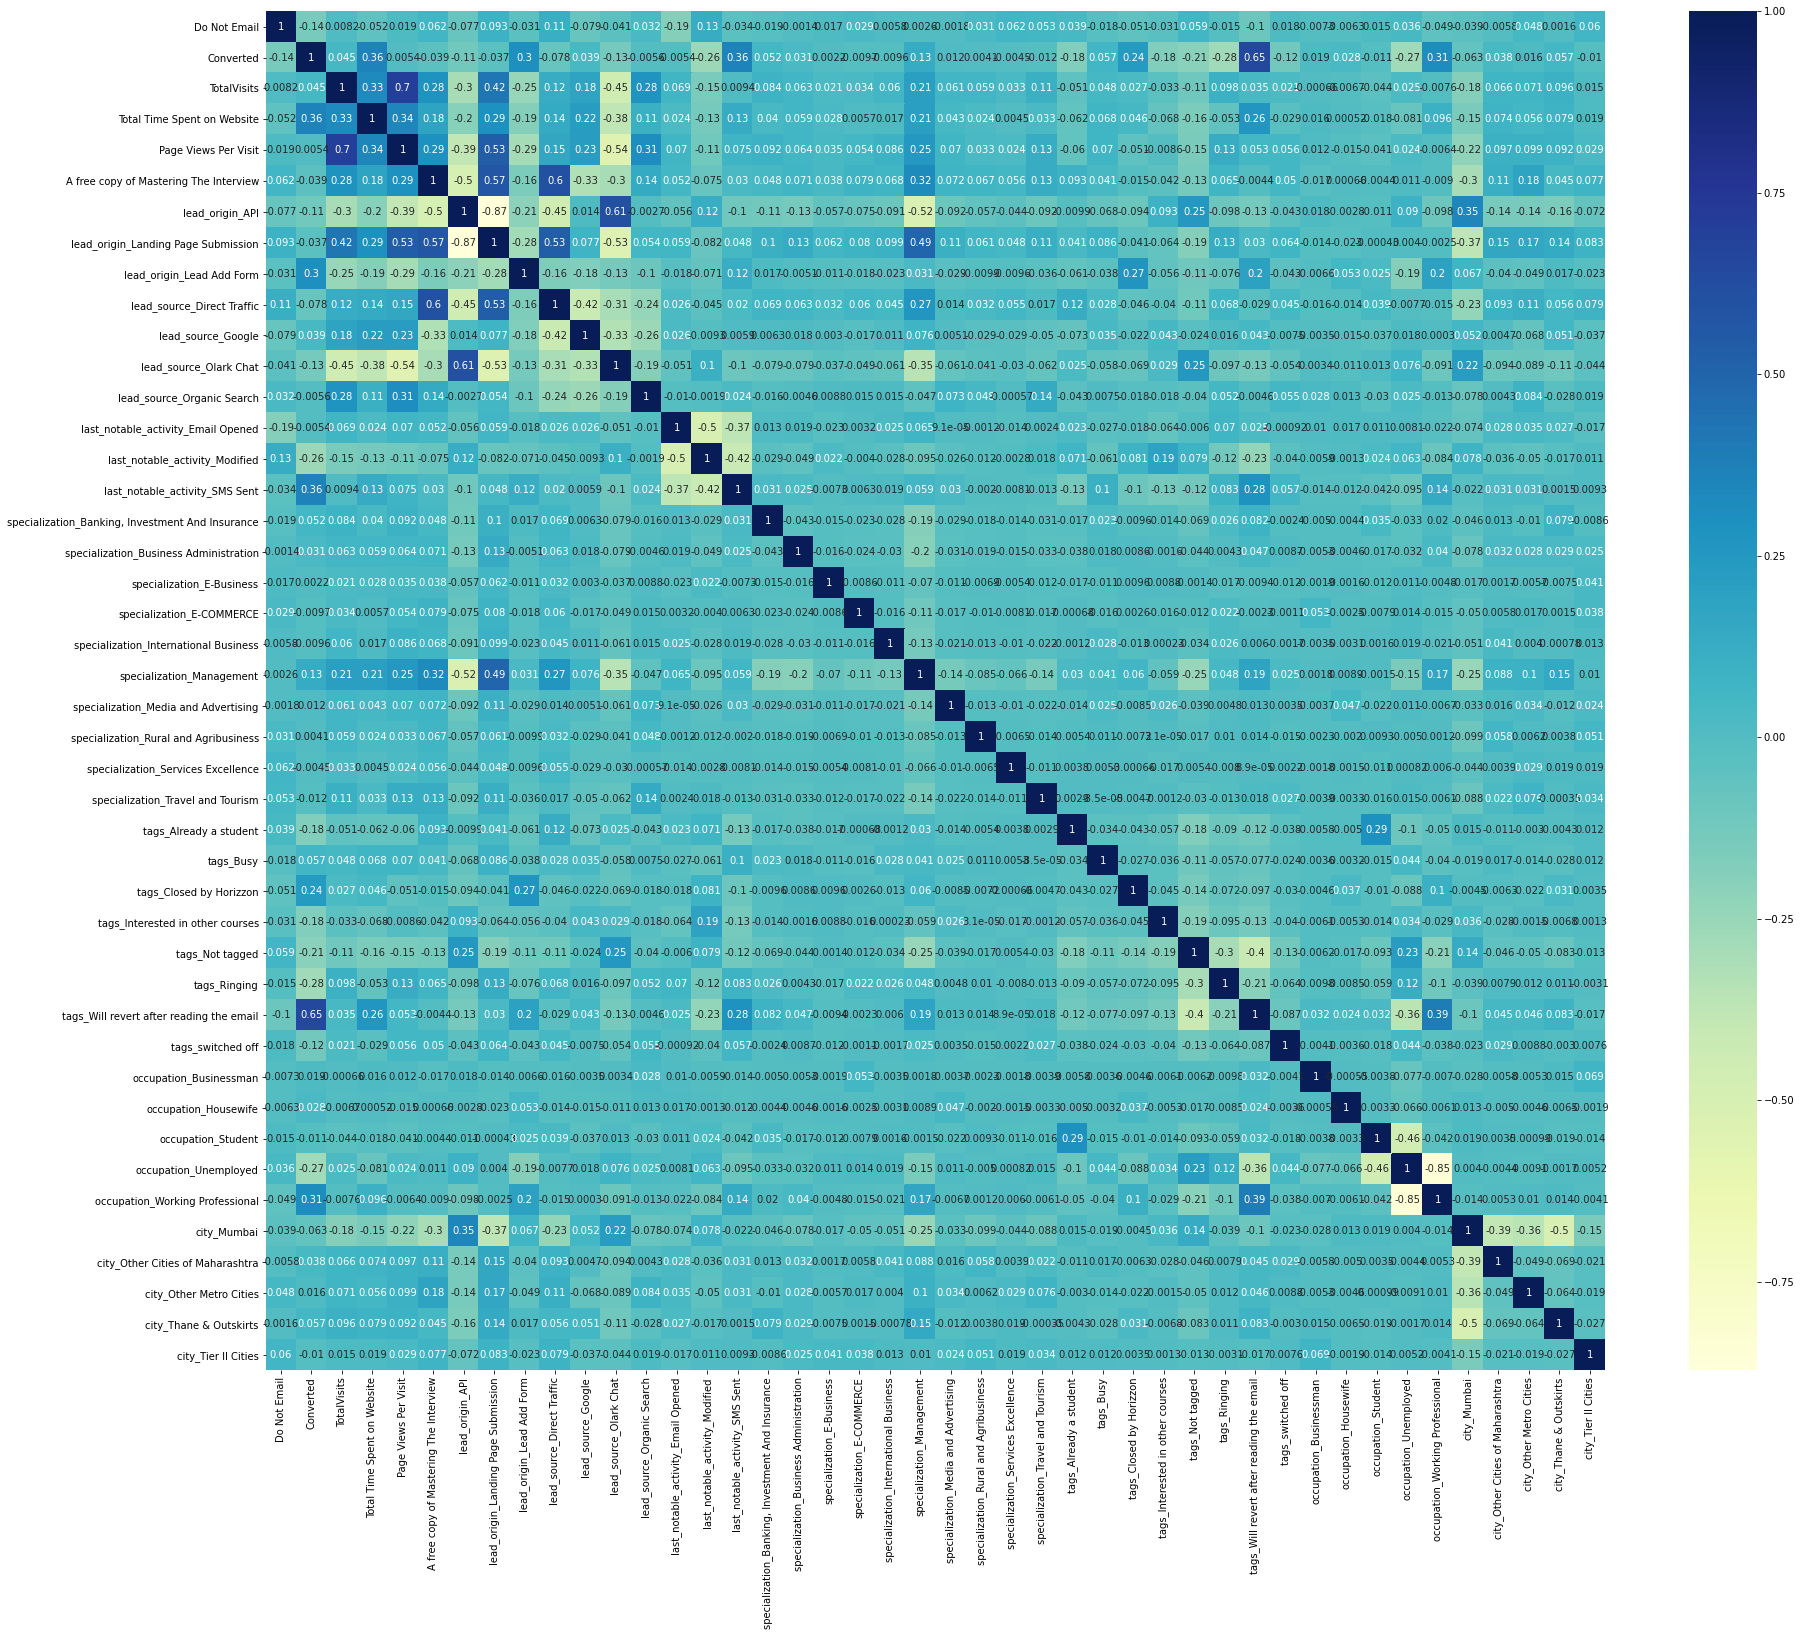

In [44]:
# Checking correlation between variables using heatmap
plt.figure(figsize=(30,25)) 
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

##### Dividing X_train and y_train:

In [45]:
y_train = df_train.pop("Converted")
X_train = df_train

### Model Building:

In [46]:
# Creating function for vif checking.
def check_vif(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

##### Feature Selection Using RFE:

In [47]:
# Using RFE to reduce features to 15.
logreg = LogisticRegression()

# running RFE with 15 variables as output
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [48]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 13),
 ('A free copy of Mastering The Interview', False, 18),
 ('lead_origin_API', True, 1),
 ('lead_origin_Landing Page Submission', True, 1),
 ('lead_origin_Lead Add Form', True, 1),
 ('lead_source_Direct Traffic', False, 12),
 ('lead_source_Google', False, 20),
 ('lead_source_Olark Chat', True, 1),
 ('lead_source_Organic Search', False, 19),
 ('last_notable_activity_Email Opened', True, 1),
 ('last_notable_activity_Modified', False, 16),
 ('last_notable_activity_SMS Sent', True, 1),
 ('specialization_Banking, Investment And Insurance', False, 7),
 ('specialization_Business Administration', False, 24),
 ('specialization_E-Business', False, 22),
 ('specialization_E-COMMERCE', False, 21),
 ('specialization_International Business', False, 4),
 ('specialization_Management', False, 29),
 ('specialization_Media and Advertising', False, 25),
 ('specialization_R

In [49]:
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website', 'lead_origin_API',
       'lead_origin_Landing Page Submission', 'lead_origin_Lead Add Form',
       'lead_source_Olark Chat', 'last_notable_activity_Email Opened',
       'last_notable_activity_SMS Sent', 'tags_Already a student',
       'tags_Closed by Horizzon', 'tags_Interested in other courses',
       'tags_Ringing', 'tags_Will revert after reading the email',
       'tags_switched off', 'occupation_Working Professional'],
      dtype='object')

In [50]:
# Crearing train dataframe with rfe selected features.
X_train_new = X_train[cols]

##### Model1: With all rfe selected variables

In [51]:
# Adding a constant.
X_train_sm = sm.add_constant(X_train_new)

# First Logistic regression model
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model_1=logm1.fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1449.7
Date:                Tue, 15 Nov 2022   Deviance:                       2899.4
Time:                        10:47:02   Pearson chi2:                 8.77e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.1034      0.994     -1.110      0.267      -3.052       0.845
Do Not Email                                -1.0595      0.229     -4.617      0.000      -1.509      -0.610
Total Time Spent on Website                  1.1045      0.056     19.710      0.000       0.995       1.214
lead_origin_API                             -1.0252      0.999     -1.026      0.305      -2.983       0.933
lead_origin_Landing Page Submission         -1.3384      0.996     -1.344      0.179      -3.290       0.614
lead_origin_Lead Add Form                    2.4139      1.029      2.346      0.019       0.397       4.431
lead_source_Olark Chat                       0.9429      0.157      5.993      0.000       0.635       1.251
last_notable_activity_Email Opened           0.8244      0.113      7.293      0.000       0.603       1.046
last_notable_activity_SMS Sent               2.8205      0.132     21.330      0.000       2.561       3.080
tags_Already a student                      -3.6184      0.724     -4.996      0.000      -5.038      -2.199
tags_Closed by Horizzon                     26.4173   1.32e+04      0.002      0.998   -2.58e+04    2.59e+04
tags_Interested in other courses            -2.3814      0.373     -6.392      0.000      -3.112      -1.651
tags_Ringing                                -3.6831      0.249    -14.812      0.000      -4.170      -3.196
tags_Will revert after reading the email     4.1289      0.182     22.651      0.000       3.772       4.486
tags_switched off                           -3.7960      0.612     -6.202      0.000      -4.996      -2.596
occupation_Working Professional              1.1311      0.352      3.217      0.001       0.442       1.820
============================================================================================================
"""

In [52]:
# Checking VIF of all variables
vif_1 = check_vif(X_train_new)
vif_1

,Features,VIF
2,lead_origin_API,2.86
3,lead_origin_Landing Page Submission,2.65
5,lead_source_Olark Chat,2.28
12,tags_Will revert after reading the email,2.03
7,last_notable_activity_SMS Sent,1.88
6,last_notable_activity_Email Opened,1.86
4,lead_origin_Lead Add Form,1.60
1,Total Time Spent on Website,1.44
11,tags_Ringing,1.36
14,occupation_Working Professional,1.32


##### Model2:

In [53]:
# tags_Closed by Horizzon

In [54]:
X_train_new.drop("tags_Closed by Horizzon", axis=1, inplace=True)

In [55]:
# Adding a constant.
X_train_sm = sm.add_constant(X_train_new)

# First Logistic regression model
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model_2=logm2.fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1615.4
Date:                Tue, 15 Nov 2022   Deviance:                       3230.9
Time:                        10:47:02   Pearson chi2:                 1.12e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.8489      0.947     -0.897      0.370      -2.704       1.007
Do Not Email                                -1.2904      0.223     -5.785      0.000      -1.728      -0.853
Total Time Spent on Website                  1.1125      0.053     20.939      0.000       1.008       1.217
lead_origin_API                             -0.9603      0.951     -1.009      0.313      -2.825       0.904
lead_origin_Landing Page Submission         -1.1517      0.948     -1.214      0.225      -3.011       0.707
lead_origin_Lead Add Form                    3.3217      0.975      3.408      0.001       1.412       5.232
lead_source_Olark Chat                       0.8538      0.149      5.726      0.000       0.562       1.146
last_notable_activity_Email Opened           0.6052      0.105      5.787      0.000       0.400       0.810
last_notable_activity_SMS Sent               2.4725      0.127     19.503      0.000       2.224       2.721
tags_Already a student                      -3.8773      0.722     -5.372      0.000      -5.292      -2.463
tags_Interested in other courses            -2.8219      0.381     -7.401      0.000      -3.569      -2.075
tags_Ringing                                -3.8970      0.254    -15.319      0.000      -4.396      -3.398
tags_Will revert after reading the email     3.8045      0.177     21.453      0.000       3.457       4.152
tags_switched off                           -3.8905      0.609     -6.387      0.000      -5.084      -2.697
occupation_Working Professional              1.9333      0.311      6.226      0.000       1.325       2.542
============================================================================================================
"""

In [56]:
# Checking VIF
vif_2 = check_vif(X_train_new)
vif_2

,Features,VIF
2,lead_origin_API,2.80
3,lead_origin_Landing Page Submission,2.51
5,lead_source_Olark Chat,2.28
11,tags_Will revert after reading the email,1.93
6,last_notable_activity_Email Opened,1.85
7,last_notable_activity_SMS Sent,1.84
1,Total Time Spent on Website,1.41
4,lead_origin_Lead Add Form,1.36
10,tags_Ringing,1.35
13,occupation_Working Professional,1.30


##### Model3:

In [57]:
# Dropping lead_origin_API.

In [58]:
X_train_new.drop("lead_origin_API", axis=1, inplace=True)

In [59]:
# Adding a constant.
X_train_sm = sm.add_constant(X_train_new)

# First Logistic regression model
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model_3=logm3.fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1615.9
Date:                Tue, 15 Nov 2022   Deviance:                       3231.9
Time:                        10:47:03   Pearson chi2:                 1.12e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.7980      0.116    -15.493      0.000      -2.025      -1.571
Do Not Email                                -1.2919      0.223     -5.791      0.000      -1.729      -0.855
Total Time Spent on Website                  1.1090      0.053     20.930      0.000       1.005       1.213
lead_origin_Landing Page Submission         -0.2020      0.118     -1.715      0.086      -0.433       0.029
lead_origin_Lead Add Form                    4.2674      0.271     15.755      0.000       3.737       4.798
lead_source_Olark Chat                       0.8395      0.148      5.663      0.000       0.549       1.130
last_notable_activity_Email Opened           0.6054      0.105      5.792      0.000       0.401       0.810
last_notable_activity_SMS Sent               2.4725      0.127     19.501      0.000       2.224       2.721
tags_Already a student                      -3.8760      0.722     -5.370      0.000      -5.291      -2.461
tags_Interested in other courses            -2.8223      0.381     -7.405      0.000      -3.569      -2.075
tags_Ringing                                -3.8947      0.254    -15.310      0.000      -4.393      -3.396
tags_Will revert after reading the email     3.8146      0.177     21.516      0.000       3.467       4.162
tags_switched off                           -3.8916      0.609     -6.390      0.000      -5.085      -2.698
occupation_Working Professional              1.9327      0.310      6.226      0.000       1.324       2.541
============================================================================================================
"""

In [60]:
# Checking VIF
vif_3 = check_vif(X_train_new)
vif_3

,Features,VIF
2,lead_origin_Landing Page Submission,2.09
10,tags_Will revert after reading the email,1.89
6,last_notable_activity_SMS Sent,1.71
5,last_notable_activity_Email Opened,1.63
1,Total Time Spent on Website,1.40
4,lead_source_Olark Chat,1.38
3,lead_origin_Lead Add Form,1.32
9,tags_Ringing,1.31
12,occupation_Working Professional,1.30
0,Do Not Email,1.13


##### Model4:

In [61]:
# Dropping lead_origin_Landing Page Submission.

In [62]:
X_train_new.drop("lead_origin_Landing Page Submission", axis=1, inplace=True)

In [63]:
# Adding a constant.
X_train_sm = sm.add_constant(X_train_new)

# First Logistic regression model
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model_4=logm4.fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1617.4
Date:                Tue, 15 Nov 2022   Deviance:                       3234.8
Time:                        10:47:03   Pearson chi2:                 1.11e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.9342      0.086    -22.462      0.000      -2.103      -1.765
Do Not Email                                -1.3081      0.222     -5.895      0.000      -1.743      -0.873
Total Time Spent on Website                  1.1081      0.053     20.920      0.000       1.004       1.212
lead_origin_Lead Add Form                    4.4091      0.259     17.039      0.000       3.902       4.916
lead_source_Olark Chat                       0.9781      0.125      7.801      0.000       0.732       1.224
last_notable_activity_Email Opened           0.6019      0.105      5.759      0.000       0.397       0.807
last_notable_activity_SMS Sent               2.4668      0.127     19.492      0.000       2.219       2.715
tags_Already a student                      -3.8951      0.722     -5.398      0.000      -5.309      -2.481
tags_Interested in other courses            -2.7957      0.381     -7.329      0.000      -3.543      -2.048
tags_Ringing                                -3.9117      0.254    -15.390      0.000      -4.410      -3.413
tags_Will revert after reading the email     3.8023      0.177     21.491      0.000       3.456       4.149
tags_switched off                           -3.8973      0.607     -6.415      0.000      -5.088      -2.707
occupation_Working Professional              1.9059      0.309      6.170      0.000       1.300       2.511
============================================================================================================
"""

In [64]:
# Checking VIF
vif_4 = check_vif(X_train_new)
vif_4

,Features,VIF
9,tags_Will revert after reading the email,1.83
5,last_notable_activity_SMS Sent,1.55
1,Total Time Spent on Website,1.39
4,last_notable_activity_Email Opened,1.37
3,lead_source_Olark Chat,1.31
11,occupation_Working Professional,1.29
2,lead_origin_Lead Add Form,1.27
8,tags_Ringing,1.23
6,tags_Already a student,1.05
10,tags_switched off,1.05


All p-values and vif values are within acceptable range. 
Taking Model 4 as final model.

##### Predicting y_train values:

In [65]:
# Getting the predicted values on the train set
y_train_pred = model_4.predict(X_train_sm)
y_train_pred

6975    0.000399
3271    0.119954
499     0.008720
6412    0.995941
6290    0.999838
          ...   
5600    0.004652
6324    0.001914
9029    0.125900
1007    0.999041
4867    0.832911
Length: 6351, dtype: float64

In [66]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:15]

array([3.98844525e-04, 1.19954144e-01, 8.71969683e-03, 9.95941229e-01,
       9.99837679e-01, 9.67532080e-01, 1.25900440e-01, 1.27109277e-02,
       1.25900440e-01, 1.44336652e-02, 2.43161091e-03, 1.05450953e-01,
       8.47985236e-01, 9.22979940e-02, 6.37595563e-02])

In [67]:
# Creating a dataframe with the actual converted and the converted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final = y_train_pred_final[["LeadID","Converted","Converted_Prob"]]
y_train_pred_final.head()

,LeadID,Converted,Converted_Prob
0,6975,0,0.000399
1,3271,0,0.119954
2,499,0,0.008720
3,6412,1,0.995941
4,6290,1,0.999838


### Plotting the ROC Curve:

In [68]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [69]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

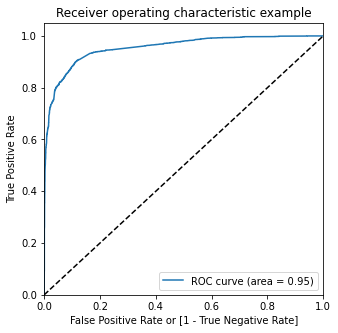

In [70]:
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

### Finding Optimal Cutoff Point:

##### Using accuracy, sensitivity and specificity:

In [71]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,LeadID,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,6975,0,0.000399,1,0,0,0,0,0,0,0,0,0
1,3271,0,0.119954,1,1,0,0,0,0,0,0,0,0
2,499,0,0.008720,1,0,0,0,0,0,0,0,0,0
3,6412,1,0.995941,1,1,1,1,1,1,1,1,1,1
4,6290,1,0.999838,1,1,1,1,1,1,1,1,1,1


In [72]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.374587  1.000000  0.000000
0.1   0.1  0.731066  0.967633  0.589376
0.2   0.2  0.870257  0.933165  0.832578
0.3   0.3  0.892773  0.886507  0.896526
0.4   0.4  0.893875  0.858344  0.915156
0.5   0.5  0.896552  0.825557  0.939074
0.6   0.6  0.897654  0.791929  0.960977
0.7   0.7  0.885530  0.736024  0.975076
0.8   0.8  0.876240  0.700294  0.981621
0.9   0.9  0.841285  0.590164  0.991692


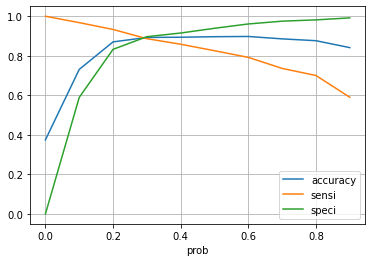

In [73]:
# plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],grid=True)
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [74]:
# Using 0.3 as cutoff for conversion.
y_train_pred_final['final_predicted'] = y_train_pred_final["Converted_Prob"].map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,LeadID,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,6975,0,0.000399,1,0,0,0,0,0,0,0,0,0,0
1,3271,0,0.119954,1,1,0,0,0,0,0,0,0,0,0
2,499,0,0.008720,1,0,0,0,0,0,0,0,0,0,0
3,6412,1,0.995941,1,1,1,1,1,1,1,1,1,1,1
4,6290,1,0.999838,1,1,1,1,1,1,1,1,1,1,1


In [75]:
# Adding lead_score column
y_train_pred_final["Lead_score"] = y_train_pred_final["Converted_Prob"].map(lambda x: round(x*100))
y_train_pred_final.head()

,LeadID,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_score
0,6975,0,0.000399,1,0,0,0,0,0,0,0,0,0,0,0
1,3271,0,0.119954,1,1,0,0,0,0,0,0,0,0,0,12
2,499,0,0.008720,1,0,0,0,0,0,0,0,0,0,0,1
3,6412,1,0.995941,1,1,1,1,1,1,1,1,1,1,1,100
4,6290,1,0.999838,1,1,1,1,1,1,1,1,1,1,1,100


In [76]:
# Accuracy:

round(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"])*100,2)

89.28

In [77]:
# Creating confusion matrix:

confusion1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final['final_predicted'])
confusion1

array([[3561,  411],
       [ 270, 2109]], dtype=int64)

In [78]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [79]:
# Sensitivity/Recall:

round(TP / float(TP+FN)*100,2)

88.65

In [80]:
round(recall_score(y_train_pred_final["Converted"], y_train_pred_final['final_predicted'])*100,2)

88.65

In [81]:
# Specificity:

round(TN / float(TN+FP)*100,2)

89.65

#### Using Precision and recall tradeoff:

In [82]:
p, r, thresholds = precision_recall_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

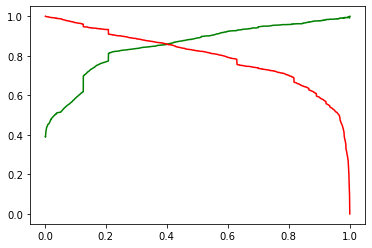

In [83]:
plt.plot(thresholds, p[:-1], "g-",)
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [84]:
# Using 0.4 as cutoff for conversion.
y_train_pred_final['final_predicted'] = y_train_pred_final["Converted_Prob"].map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,LeadID,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_score
0,6975,0,0.000399,1,0,0,0,0,0,0,0,0,0,0,0
1,3271,0,0.119954,1,1,0,0,0,0,0,0,0,0,0,12
2,499,0,0.008720,1,0,0,0,0,0,0,0,0,0,0,1
3,6412,1,0.995941,1,1,1,1,1,1,1,1,1,1,1,100
4,6290,1,0.999838,1,1,1,1,1,1,1,1,1,1,1,100


In [85]:
# Adding lead_score column
y_train_pred_final["Lead_score"] = y_train_pred_final["Converted_Prob"].map(lambda x: round(x*100))
y_train_pred_final.head()

,LeadID,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_score
0,6975,0,0.000399,1,0,0,0,0,0,0,0,0,0,0,0
1,3271,0,0.119954,1,1,0,0,0,0,0,0,0,0,0,12
2,499,0,0.008720,1,0,0,0,0,0,0,0,0,0,0,1
3,6412,1,0.995941,1,1,1,1,1,1,1,1,1,1,1,100
4,6290,1,0.999838,1,1,1,1,1,1,1,1,1,1,1,100


In [86]:
# Accuracy:

round(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"])*100,2)

89.39

In [87]:
# Recall:

round(recall_score(y_train_pred_final["Converted"], y_train_pred_final['final_predicted'])*100,2)

85.83

In [88]:
# Precision:

round(metrics.precision_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"])*100,2)

85.83

### Making predictions on the test set

In [89]:
# Applying scaler to all continuous variables.
df_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.transform(df_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

In [90]:
# checking head of the test data after scaling
df_test.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_source_Direct Traffic,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,last_notable_activity_Email Opened,last_notable_activity_Modified,last_notable_activity_SMS Sent,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_International Business,specialization_Management,specialization_Media and Advertising,specialization_Rural and Agribusiness,specialization_Services Excellence,specialization_Travel and Tourism,tags_Already a student,tags_Busy,tags_Closed by Horizzon,tags_Interested in other courses,tags_Not tagged,tags_Ringing,tags_Will revert after reading the email,tags_switched off,occupation_Businessman,occupation_Housewife,occupation_Student,occupation_Unemployed,occupation_Working Professional,city_Mumbai,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_Tier II Cities
2273,0,1,-1.024736,-0.885810,-1.180719,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
5875,0,0,-1.024736,-0.885810,-1.180719,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
6650,0,1,-0.103257,-0.856279,-0.418186,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
989,0,0,0.511062,-0.164155,0.090170,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
5037,0,1,0.203903,1.926984,0.852703,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0


##### Dividing into X_test and y_test:

In [91]:
y_test = df_test.pop("Converted")
X_test = df_test

##### Making predictions for y_test:

In [92]:
# Dropping variable that are not there in final model from X_test dataframe
X_test_new = X_test[X_train_new.columns]

In [93]:
# Adding constant variable to X_test_new
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_test_pred = model_4.predict(X_test_new)

In [94]:
y_test_pred

2273    0.816570
5875    0.125900
6650    0.820699
989     0.180304
5037    0.982074
          ...   
4069    0.244851
8254    0.125900
7257    0.051656
7797    0.002921
1961    0.639641
Length: 2723, dtype: float64

In [95]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:15]

array([8.16569921e-01, 1.25900440e-01, 8.20699129e-01, 1.80304286e-01,
       9.82073757e-01, 5.32023847e-03, 5.23832225e-02, 6.30309449e-02,
       1.14614580e-03, 1.25900440e-01, 6.26830432e-01, 9.98996742e-01,
       9.97491292e-01, 1.25900440e-01, 3.55698531e-04])

In [96]:
# Creating a dataframe with the actual converted and the converted probabilities
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_Prob':y_test_pred})
y_test_pred_final['LeadID'] = y_test.index
y_test_pred_final = y_test_pred_final[["LeadID","Converted","Converted_Prob"]]
y_test_pred_final.head()

,LeadID,Converted,Converted_Prob
0,2273,1,0.816570
1,5875,0,0.125900
2,6650,1,0.820699
3,989,0,0.180304
4,5037,1,0.982074


##### Using 0.3 cutoff obtained from using accuracy, sensitivity and specificity

In [97]:
y_test_pred_final['final_predicted'] = y_test_pred_final["Converted_Prob"].map( lambda x: 1 if x > 0.3 else 0)
y_test_pred_final.head()

,LeadID,Converted,Converted_Prob,final_predicted
0,2273,1,0.816570,1
1,5875,0,0.125900,0
2,6650,1,0.820699,1
3,989,0,0.180304,0
4,5037,1,0.982074,1


In [98]:
# Adding lead_score column
y_test_pred_final["Lead_score"] = y_test_pred_final["Converted_Prob"].map(lambda x: round(x*100))
y_test_pred_final.head()

,LeadID,Converted,Converted_Prob,final_predicted,Lead_score
0,2273,1,0.816570,1,82
1,5875,0,0.125900,0,13
2,6650,1,0.820699,1,82
3,989,0,0.180304,0,18
4,5037,1,0.982074,1,98


In [99]:
# Accuracy:

round(metrics.accuracy_score(y_test_pred_final["Converted"], y_test_pred_final["final_predicted"])*100,2)

89.72

In [100]:
# Creating confusion matrix:

confusion2 = metrics.confusion_matrix(y_test_pred_final["Converted"], y_test_pred_final['final_predicted'])
confusion2

array([[1505,  162],
       [ 118,  938]], dtype=int64)

In [101]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [102]:
# Sensitivity:

round(TP / float(TP+FN)*100,2)

88.83

In [103]:
round(recall_score(y_test_pred_final["Converted"], y_test_pred_final['final_predicted'])*100,2)

88.83

In [104]:
# Specificity

round(TN / float(TN+FP)*100,2)

90.28

##### Using 0.4 cutoff obtained from precision recall curve:

In [105]:
y_test_pred_final['final_predicted'] = y_test_pred_final["Converted_Prob"].map( lambda x: 1 if x > 0.4 else 0)
y_test_pred_final.head()

,LeadID,Converted,Converted_Prob,final_predicted,Lead_score
0,2273,1,0.816570,1,82
1,5875,0,0.125900,0,13
2,6650,1,0.820699,1,82
3,989,0,0.180304,0,18
4,5037,1,0.982074,1,98


In [106]:
# Adding lead_score column
y_test_pred_final["Lead_score"] = y_test_pred_final["Converted_Prob"].map(lambda x: round(x*100))
y_test_pred_final.head()

,LeadID,Converted,Converted_Prob,final_predicted,Lead_score
0,2273,1,0.816570,1,82
1,5875,0,0.125900,0,13
2,6650,1,0.820699,1,82
3,989,0,0.180304,0,18
4,5037,1,0.982074,1,98


In [107]:
# Accuracy:

round(metrics.accuracy_score(y_test_pred_final["Converted"], y_test_pred_final["final_predicted"])*100,2)

89.64

In [108]:
# Recall:

round(recall_score(y_test_pred_final["Converted"], y_test_pred_final['final_predicted'])*100,2)

86.17

In [109]:
# Precision:

round(metrics.precision_score(y_test_pred_final["Converted"], y_test_pred_final["final_predicted"])*100,2)

87.0

##### Result comparison:

Using optimal cutoff of 0.3 obtained by using accuracy, sensitivity and specificity tradeoff:

#### Train data:

Accuracy : 89.28

Sensitivity : 88.65

Specificity : 89.05

#### Test data:

Accuracy : 89.72

Sensitivity : 88.83

Specificity : 90.28